In [577]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
import h5py
import requests


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [578]:
prices_dataset =  pd.read_csv('prices.csv', header=0)
print(type(prices_dataset))
prices_dataset.head()


<class 'pandas.core.frame.DataFrame'>


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [579]:
print(set(prices_dataset.symbol))
len(set(prices_dataset.symbol))

{'AN', 'APA', 'WLTW', 'ADM', 'VRSN', 'SE', 'UHS', 'ABC', 'MSI', 'WYNN', 'HAS', 'CMI', 'UNH', 'MNST', 'FE', 'HOG', 'MJN', 'L', 'UDR', 'APH', 'PNC', 'HOLX', 'SLG', 'ADS', 'COTY', 'PEG', 'WAT', 'HRL', 'EMR', 'VZ', 'WHR', 'EXC', 'GS', 'NEM', 'PGR', 'UAA', 'FL', 'ESS', 'FMC', 'NAVI', 'LOW', 'BIIB', 'UNP', 'NBL', 'AEP', 'AVGO', 'KSU', 'ISRG', 'PX', 'GOOG', 'HRS', 'CVX', 'MON', 'FITB', 'MO', 'LNT', 'CNC', 'TWX', 'MHK', 'SPGI', 'AME', 'TGNA', 'SPG', 'FBHS', 'PCG', 'TAP', 'VNO', 'CINF', 'GGP', 'AVB', 'GILD', 'ANTM', 'OKE', 'LUK', 'BWA', 'SRE', 'MTB', 'LKQ', 'ADBE', 'FIS', 'MCK', 'URBN', 'SYMC', 'FRT', 'IR', 'ZTS', 'FLS', 'LVLT', 'PPG', 'LB', 'XRAY', 'V', 'AIG', 'GE', 'WEC', 'TSO', 'PRGO', 'CHTR', 'VIAB', 'DGX', 'EQR', 'PAYX', 'WBA', 'ALB', 'CB', 'LNC', 'GIS', 'COL', 'FFIV', 'SBUX', 'SIG', 'LH', 'CMCSA', 'IVZ', 'KSS', 'AMG', 'AMT', 'AJG', 'KLAC', 'STZ', 'ALK', 'KMX', 'PG', 'RCL', 'PRU', 'PNW', 'LYB', 'ACN', 'TIF', 'PPL', 'BK', 'EQIX', 'EXPE', 'MCHP', 'FOXA', 'NTRS', 'CVS', 'XEL', 'ITW', 'YUM', '

501

## Viewing close share  fluctuations for Adobe as usecase

#### Since companies tend to have fluctuating prices throughout the day, a decent estimate to take the closing price of a stock. Investors and other stakeholders base their decisions on closing stock prices. Institutional investors monitor a stock's closing price to make decisions regarding their investment portfolios.

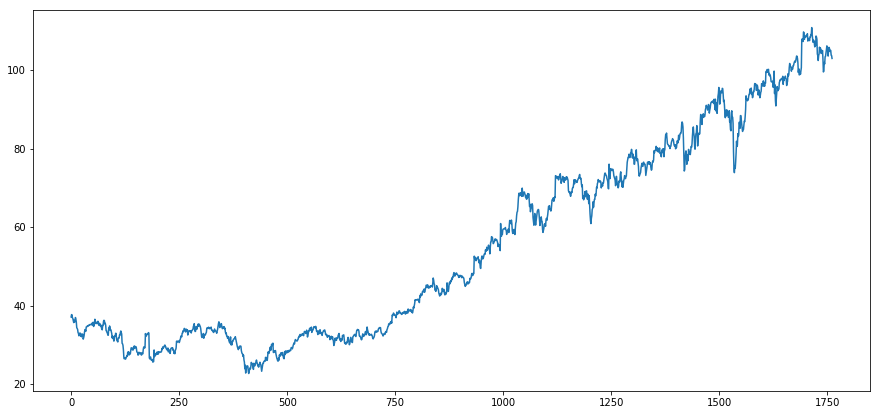

In [580]:
microsoft = prices_dataset[prices_dataset['symbol']=='ADBE']
msft_stock_prices = microsoft.close.values.astype('float32')
msft_stock_prices = msft_stock_prices.reshape(1762, 1)
plt.plot(msft_stock_prices)
plt.show()

In [581]:
security_dataset =  pd.read_csv('securities.csv', header=0)
security_dataset.head()


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [582]:
print(set(security_dataset.Security))
len(set(security_dataset.Security))

{"Lowe's Cos.", 'Church & Dwight', 'Envision Healthcare Corp', 'Alliance Data Systems', 'Alphabet Inc Class A', 'Allergan, Plc', 'Occidental Petroleum', 'Western Digital', 'Zimmer Biomet Holdings', 'Under Armour', 'LKQ Corporation', 'Johnson & Johnson', 'Martin Marietta Materials', 'Western Union Co', 'SCANA Corp', 'Urban Outfitters', 'Pinnacle West Capital', 'Wynn Resorts Ltd', 'Valero Energy', 'Archer-Daniels-Midland Co', 'Ross Stores', 'Philip Morris International', 'Hormel Foods Corp.', '3M Company', 'Symantec Corp.', 'AutoZone Inc', 'AT&T Inc', 'Verisign Inc.', 'Darden Restaurants', 'Schlumberger Ltd.', 'ONEOK', 'Lincoln National', 'Vertex Pharmaceuticals Inc', 'Equity Residential', 'Xcel Energy Inc', 'Noble Energy Inc', 'Merck & Co.', 'Baker Hughes Inc', 'NetApp', 'Williams Cos.', 'Equinix', 'The Mosaic Company', 'Anthem Inc.', 'AutoNation Inc', 'Kroger Co.', 'Activision Blizzard', 'PNC Financial Services', 'General Growth Properties Inc.', 'Humana Inc.', 'Synchrony Financial', '

504

In [583]:
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Plotting price adjustments for a few companies
##### Through this cell, I have selected a few giants in order to visualise how  open,close,high,low parameteres fluctuate throughout the day as well as over 1751 days

In [584]:
comp_plot = security_dataset.loc[(security_dataset["Security"] == 'Yahoo Inc.') | (security_dataset["Security"] == 'Xerox Corp.') | (security_dataset["Security"] == 'Adobe Systems Inc')
              | (security_dataset["Security"] == 'Microsoft Corp.') | (security_dataset["Security"] == 'Adobe Systems Inc') 
              | (security_dataset["Security"] == 'Facebook') | (security_dataset["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


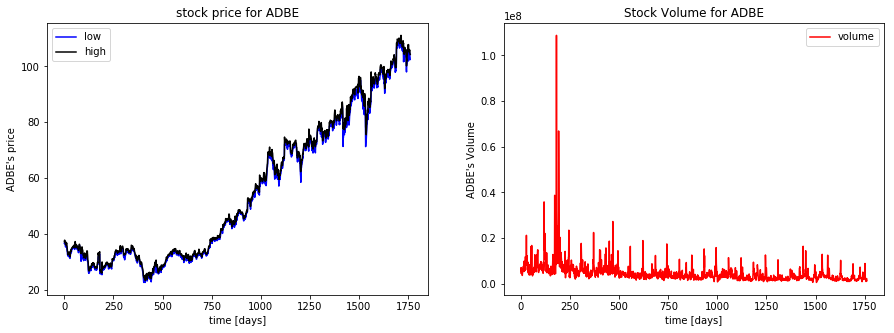

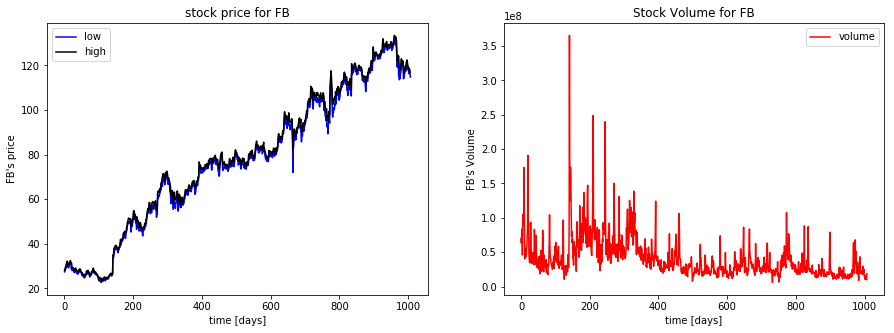

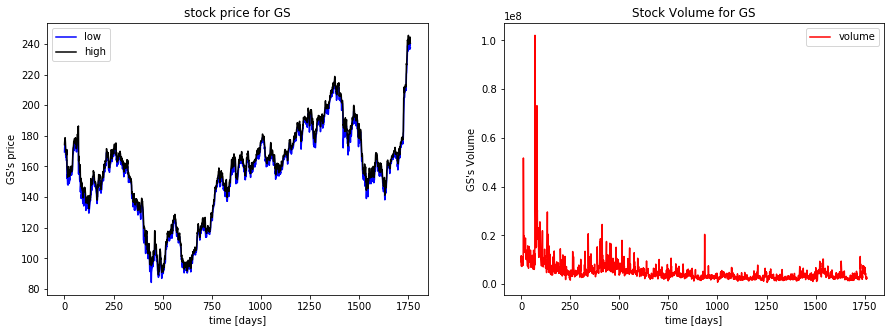

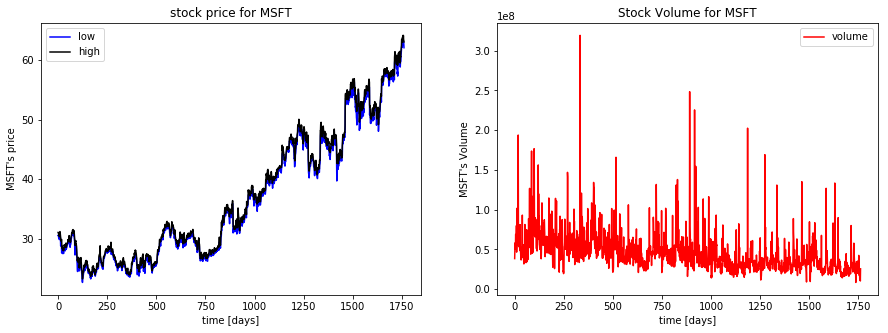

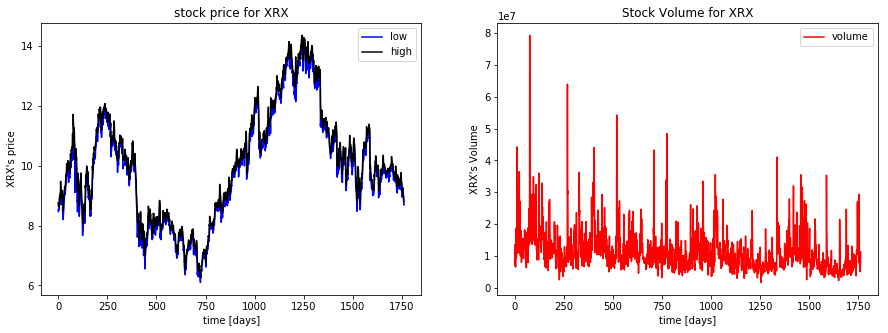

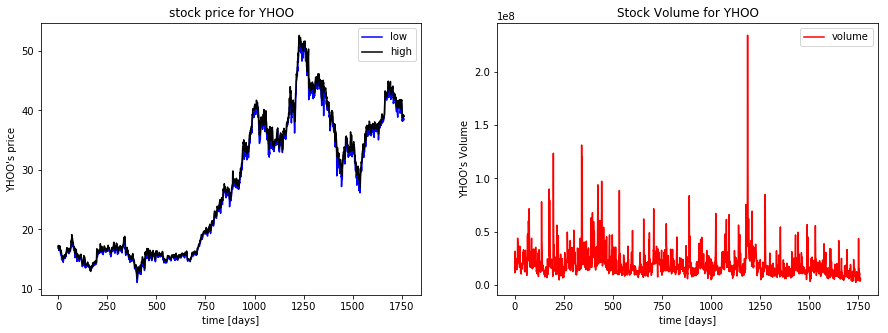

In [585]:
def highlow(code):
    plt.figure(figsize=(15, 5));
    plt.subplot(1,2,1);
    plt.plot(df[df.symbol == code].low.values, color='blue', label='low')
    plt.plot(df[df.symbol == code].high.values, color='black', label='high')
    plt.title("stock price for "+ code)
    plt.xlabel('time [days]')
    plt.ylabel(code +"'s price")
    plt.legend(loc='best')
#plt.show()

    plt.subplot(1,2,2);
    plt.plot(df[df.symbol == code].volume.values, color='red', label='volume')
    plt.title("Stock Volume for "+ code)
    plt.xlabel('time [days]')
    plt.ylabel(code +"'s Volume")
    plt.legend(loc='best');
for i in comp_plot:
    highlow(i)

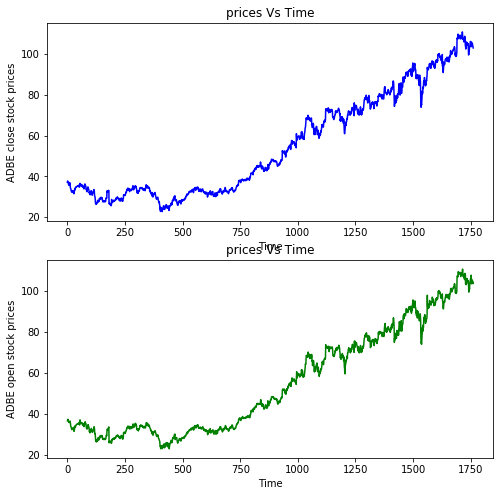

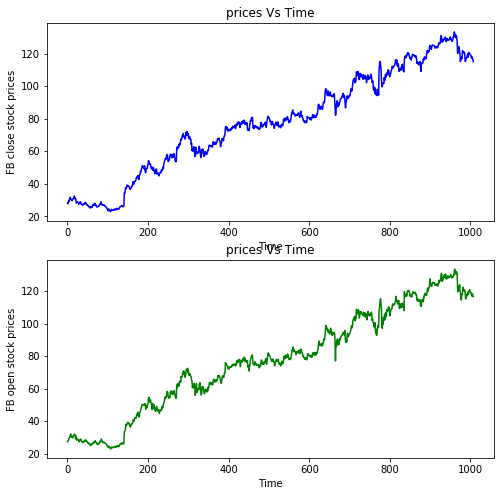

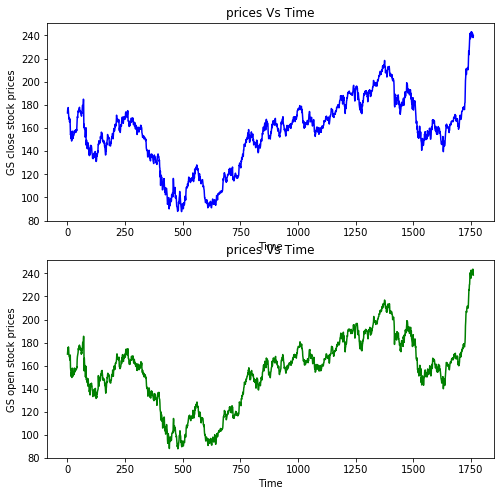

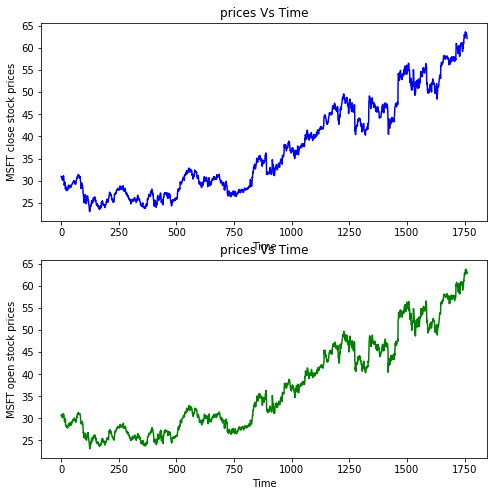

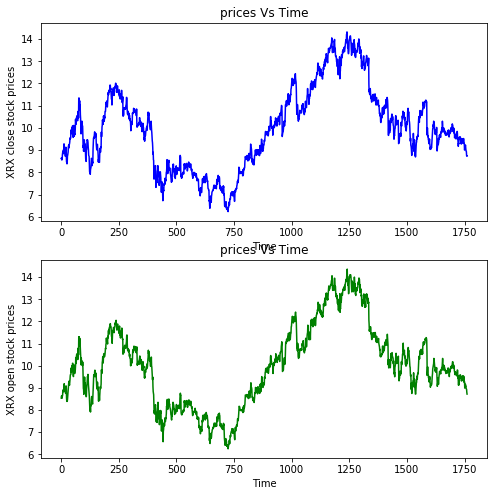

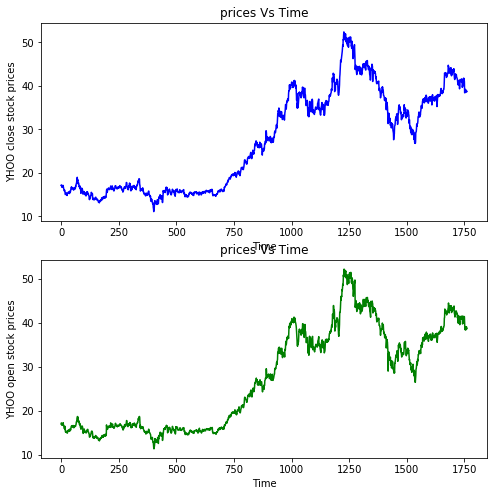

In [586]:
def a_few_companies(code):
    global closing_stock
    global opening_stock
    f, axs = plt.subplots(2,2,figsize=(8,8))
    plt.subplot(212)
    company = df[df['symbol']==code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1, 1)
    opening_stock = company
    plt.xlabel('Time')
    plt.ylabel(code + " open stock prices")
    plt.title('prices Vs Time')
    plt.plot(company , 'g')
    
    plt.subplot(211)
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.plot(company_close , 'b')
    plt.show()
for i in comp_plot:
    a_few_companies(i)

### Can we possibly predict the future close stock_price based on the previous closing prices? Let's see if that's possible. I'lll pick Adobe for this usecase

In [587]:
adobe = df[df['symbol']=='ADBE']
adobe['year'] = adobe.index
adobe['year'] = adobe['year'].str[0:4]
print(adobe['year'].nunique())
adobe.head()
#goldman_sachs['year'] = goldman_sachs['date']

7


,symbol,open,close,low,high,volume,year
date,,,,,,,
2010-01-04,ADBE,36.650002,37.090000,36.650002,37.299999,4710200.0,2010
2010-01-05,ADBE,37.040001,37.700001,36.869999,37.799999,7108800.0,2010
2010-01-06,ADBE,37.330002,37.619999,37.200001,37.740002,5336400.0,2010
2010-01-07,ADBE,37.410000,36.889999,36.810001,37.590000,5576700.0,2010
2010-01-08,ADBE,36.750000,36.689999,36.340000,36.970001,5429200.0,2010


In [588]:
adb_stocks = adobe['close'][0:] 
print(adb_stocks.head())
stocks = adb_stocks.reshape(len(adb_stocks) , 1)

date
2010-01-04    37.090000
2010-01-05    37.700001
2010-01-06    37.619999
2010-01-07    36.889999
2010-01-08    36.689999
Name: close, dtype: float64


In [589]:
## Normalizing the close price stock per day.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stocks = scaler.fit_transform(stocks)

## Preparing training and test data of Adobe

In [590]:
train = int(len(stocks) * 0.75)
test = len(stocks) - train
print("Training examples count are " + str(train))
print("Training examples count are " + str(test))

Training examples count are 1321
Training examples count are 441


In [591]:
train = stocks[0:train]
test = stocks[len(train):]

In [592]:
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)

print(train.shape , test.shape)

(1321, 1) (441, 1)


### The method here involves seleccting the closing stock prices over the last n_features days in order to predict the third  day. This approach will similarly be used throughout the 7 years timesteps

In [593]:
def process_data(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [594]:
##n_features has been selected after considering possibilities from 2 to 10.
n_features = 2

trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [595]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1318, 2) (1318,) (438, 2) (438,)


In [596]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [597]:
filepath="stocks.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

## Training and Testing through LSTM approach

In [598]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop
import keras

In [599]:
model = Sequential()
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 1, 256)            198912    
_________________________________________________________________
dropout_45 (Dropout)         (None, 1, 256)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 65        
Total params: 740,737
Trainable params: 740,737
Non-trainable params: 0
_________________________________________________________________
None

In [600]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [601]:
history = model.fit(trainX, trainY, epochs=75 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))

Train on 1318 samples, validate on 438 samples
Epoch 1/75
1318/1318 [==============================] - 15s 12ms/step - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.3218 - val_mean_squared_error: 0.3218

Epoch 00001: val_loss improved from -inf to 0.32179, saving model to stocks.hdf5
Epoch 2/75
1318/1318 [==============================] - 2s 1ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0288 - val_mean_squared_error: 0.0288

Epoch 00002: val_loss did not improve
Epoch 3/75
1318/1318 [==============================] - 2s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0296 - val_mean_squared_error: 0.0296

Epoch 00003: val_loss did not improve
Epoch 4/75
1318/1318 [==============================] - 2s 1ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0299 - val_mean_squared_error: 0.0299

Epoch 00004: val_loss did not improve

Epoch 00004: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 5/75
131

1318/1318 [==============================] - 2s 1ms/step - loss: 6.9009e-04 - mean_squared_error: 6.9009e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00034: val_loss did not improve

Epoch 00034: ReduceLROnPlateau reducing learning rate to 5.000000332466102e-19.
Epoch 35/75
1318/1318 [==============================] - 2s 2ms/step - loss: 7.3482e-04 - mean_squared_error: 7.3482e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00035: val_loss did not improve

Epoch 00035: ReduceLROnPlateau reducing learning rate to 5.000000229068525e-20.
Epoch 36/75
1318/1318 [==============================] - 2s 2ms/step - loss: 7.4282e-04 - mean_squared_error: 7.4282e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00036: val_loss did not improve

Epoch 00036: ReduceLROnPlateau reducing learning rate to 5.00000016444504e-21.
Epoch 37/75
1318/1318 [==============================] - 3s 2ms/step - loss: 7.3859e-04 - mean_squared_error: 

1318/1318 [==============================] - 2s 2ms/step - loss: 6.5514e-04 - mean_squared_error: 6.5514e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00061: val_loss did not improve

Epoch 00061: ReduceLROnPlateau reducing learning rate to 5.6051938572992686e-46.
Epoch 62/75
1318/1318 [==============================] - 2s 1ms/step - loss: 6.7076e-04 - mean_squared_error: 6.7076e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00062: val_loss did not improve
Epoch 63/75
1318/1318 [==============================] - 2s 2ms/step - loss: 7.1159e-04 - mean_squared_error: 7.1159e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00063: val_loss did not improve
Epoch 64/75
1318/1318 [==============================] - 2s 2ms/step - loss: 7.2815e-04 - mean_squared_error: 7.2815e-04 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04

Epoch 00064: val_loss did not improve
Epoch 65/75
1318/1318 [===========================

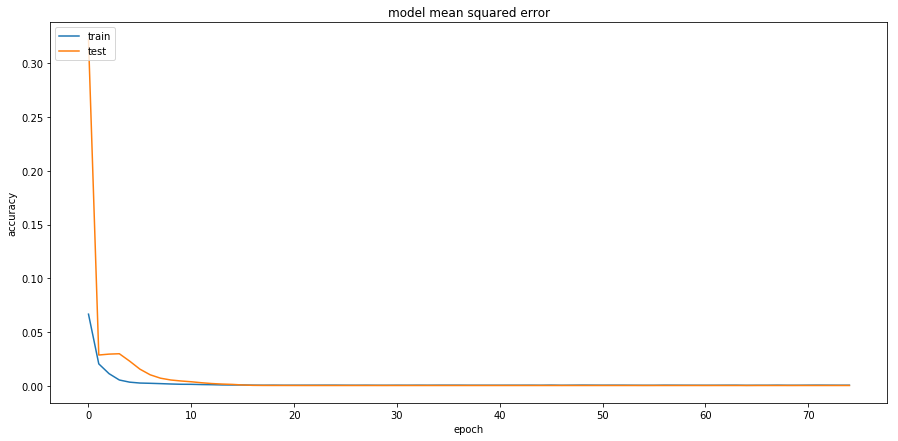

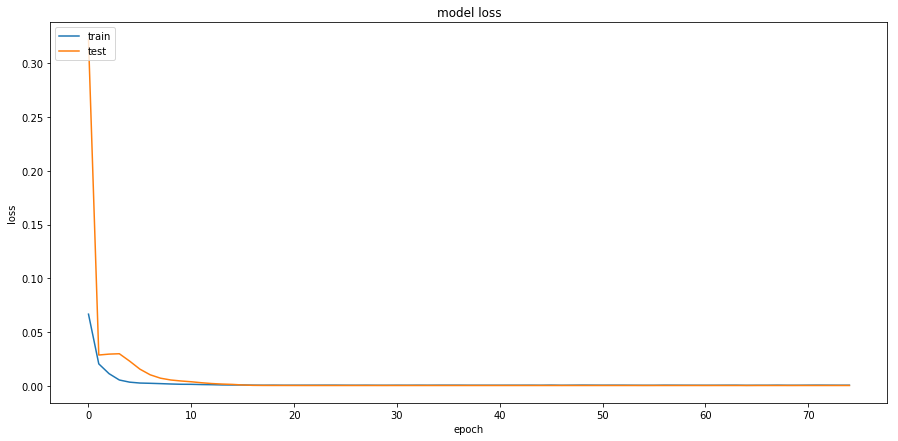

In [602]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [603]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, trainX, trainY , testX, testY)

Train Score: 0.00016 MSE (0.01 RMSE)
Test Score: 0.00043 MSE (0.02 RMSE)


(0.00016167152102235339, 0.0004332081307646431)

### Reverse the normalization for the test results and the predictions

In [604]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)

testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)

### A rough estimator of how well the predictions are compared to original results. It has been visually portrayed 

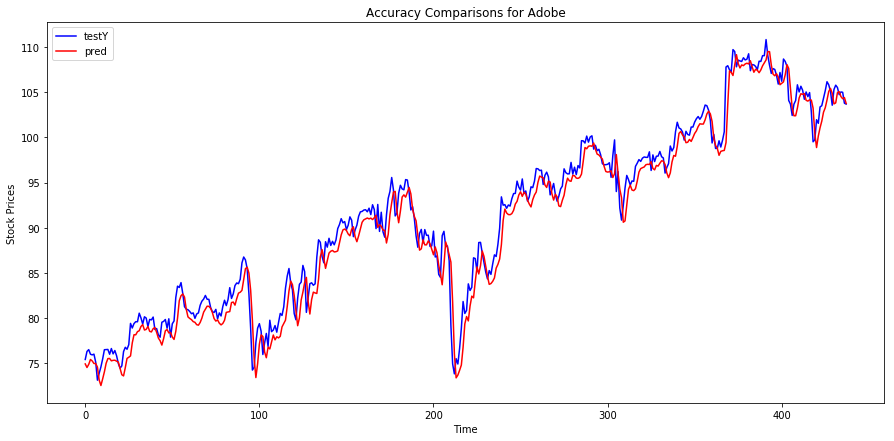

In [605]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Accuracy Comparisons for Adobe')
plt.legend(['testY', 'pred'], loc='upper left')
plt.show()